In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
  return 1/(1+np.e**(-x))

def sigmoid_derivate(x):
  return sigmoid(x)*(1 - sigmoid(x))

def ReLU(x):
  return np.maximum(0, x)

def ReLU_derivate(x):
  return x > 0

def softmax(A):
  exp_A = np.e**(A - np.max(A))
  return exp_A / np.sum(exp_A)

# Modelo de Red Neuronal

In [3]:
class Layer:
    def __init__(self, input, output, activation=sigmoid, activation_derivate=sigmoid_derivate):
        self.units = output
        self.weights = np.random.randn(output, input)
        self.bias = np.random.randn(output, 1)
        self.activation = activation
        self.activation_derivate = activation_derivate

    def A(self, A_prev):
        return self.activation(np.dot(self.weights, A_prev).reshape(self.units,1) + self.bias)

    def z(self, A_prev):
        return np.dot(self.weights, A_prev).reshape(self.units,1) + self.bias

In [4]:
class NeuralNetwork:
    def __init__(self):
        self.layers = list()

    def set(self, layer):
        self.layers.append(layer)

    def feedfoward(self, X, n=None):
        n= len(self.layers) if not n else n

        for layer in self.layers[:n]:
            X = layer.A(X)

        return X
    
    def backpropagation(self, X, y, lr=0.01):
        A = self.feedfoward(X)
        A = A.reshape(len(A),1)
        y = y.reshape(len(y),1)

        # Calculamos el error de la última capa
        error = A - y

        A_prev = self.feedfoward(X, -1)
        A_prev = A_prev.reshape(len(A_prev),1)

        # actualizamos los pesos de la última capa
        dW = error.dot(A_prev.T)

        self.layers[-1].weights -= dW
        self.layers[-1].bias -= error

        # Calculamos el error de la capa anterior
        A_prev_2 = self.feedfoward(X, -2)
        A_prev_2 = A_prev_2.reshape(len(A_prev_2),1)

        derivate = self.layers[-2].activation_derivate(self.layers[-2].z(A_prev_2))
        dz2 = derivate*self.layers[-1].weights.T.dot(error)
        self.layers[-2].bias -= lr*dz2
        
        dz2 = dz2.dot(A_prev_2.T)
        self.layers[-2].weights -= lr*dz2

In [5]:
nn = NeuralNetwork()

nn.set(Layer(2, 3, activation=ReLU, activation_derivate=ReLU_derivate))
nn.set(Layer(3, 2))

In [6]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float64)
y = np.array([[1,0],[0,1],[0,1],[1,0]], dtype=np.float64)

X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float64)
y = np.array([[1,0],[0,1],[0,1],[1,0]], dtype=np.float64)

In [7]:
# train
for i in range(10000):
    for j in range(len(X)):
        nn.backpropagation(X[j], y[j], lr=0.0001)

# accuracy
acc = 0
for i in range(len(X)):
    pred = nn.feedfoward(X[i])
    if np.argmax(pred) == np.argmax(y[i]):
        acc += 1

print(f"Se ha obtenido una precisión del {acc/len(X)*100}%")

Se ha obtenido una precisión del 100.0%


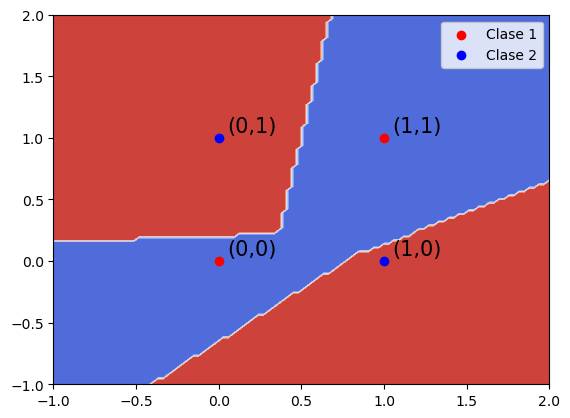

In [8]:
x = np.linspace(-1, 2, 100)
y = np.linspace(-1, 2, 100)

X, Y = np.meshgrid(x, y)

Z = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        Z[i][j] = np.argmax(nn.feedfoward([X[i][j], Y[i][j]]))

plt.contourf(X, Y, Z, cmap='coolwarm')
plt.scatter(0,0, c='r')
plt.scatter(1,1, c='r')
plt.scatter(0,1, c='b')
plt.scatter(1,0, c='b')

plt.text(0.05, 0.05, "(0,0)", fontsize=15)
plt.text(1.05, 1.05, "(1,1)", fontsize=15)
plt.text(0.05, 1.05, "(0,1)", fontsize=15)
plt.text(1.05, 0.05, "(1,0)", fontsize=15)

plt.scatter([], [], c='r', label='Clase 1')
plt.scatter([], [], c='b', label='Clase 2')
plt.legend()

plt.show()

# Prueba con el conjunto IRIS

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1,1)).toarray()

nn = NeuralNetwork()

nn.set(Layer(4, 10, activation=sigmoid, activation_derivate=sigmoid_derivate))
nn.set(Layer(10, 3, activation=softmax, activation_derivate=None))

# train
for i in range(1000):
    for j in range(len(X)):
        nn.backpropagation(X[j], y[j], lr=0.0001)

# accuracy
acc = 0
for i in range(len(X)):
    pred = nn.feedfoward(X[i])
    if np.argmax(pred) == np.argmax(y[i]):
        acc += 1

print(f"Se ha obtenido una precisión del {acc/len(X)*100}%")

Se ha obtenido una precisión del 97.33333333333334%


# Prueba con el conjunto MNIST

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Dataset hape:", x_train.shape)

Dataset hape: (60000, 28, 28)


In [12]:
x_train = x_train.reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

nn = NeuralNetwork()
nn.set(Layer(784, 15, activation=sigmoid, activation_derivate=sigmoid_derivate))
nn.set(Layer(15, 10, activation=softmax))

In [13]:
# train
for i in range(10):
    for j in range(len(x_train)):
        nn.backpropagation(x_train[j], y_train[j], lr=0.01)

    print("Epoch", i, "finished")

# accuracy
acc = 0
for i in range(len(x_test)):
    pred = nn.feedfoward(x_test[i])
    if np.argmax(pred) == np.argmax(y_test[i]):
        acc += 1

acc/len(x_test)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished


0.9024

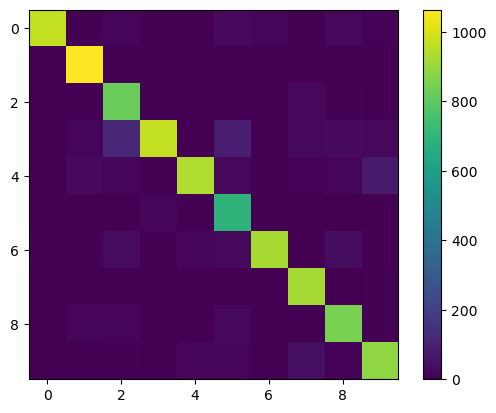

In [15]:
confusion_matrix = np.zeros((10,10))

for i in range(len(x_test)):
    pred = nn.feedfoward(x_test[i])
    confusion_matrix[np.argmax(pred)][np.argmax(y_test[i])] += 1

plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()